# Color correction

In [1]:
# https://plantcv.readthedocs.io/en/latest/transform_correct_color/
# Load in plantcv
from plantcv import plantcv as pcv
import cv2
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
import colorsys
import matplotlib.colors as colors
from ipywidgets import interactive,fixed
from scipy import ndimage
import skimage.color as color

class options:
    def __init__(self):
        self.debug = "plot"
        self.writeimg= False
        self.result = "color_tutorial_results.json"
        self.outdir = "."
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

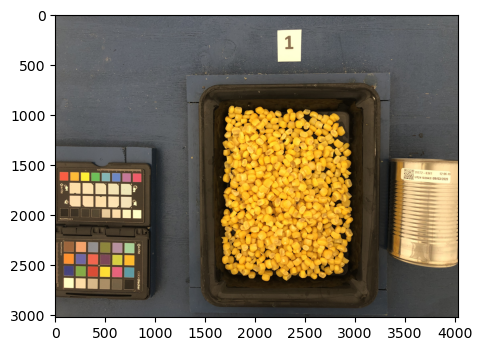

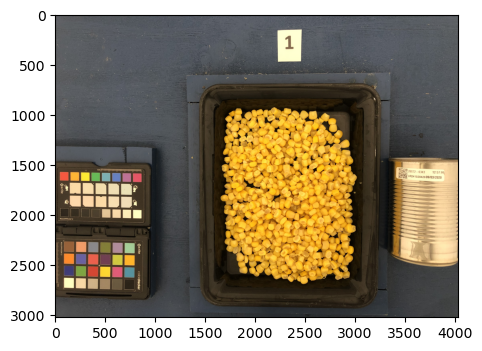

In [12]:
# Import target and source images w/ color cards
# Source = the image that will be color corrected, target = the image used to determine baseline color
target_img, targetpath, targetname = pcv.readimage(filename="IMG_9311.JPG")
source_img, sourcepath, sourcename = pcv.readimage(filename="IMG_9312.JPG")

In [13]:
def color_threshold(target_img, rmin=-1,rmax=256,gmin=-1,gmax=256,bmin=-1,bmax=256):
    # Pull out the red, gree and blue matrixes
    r = target_img[:,:,0];
    g = target_img[:,:,1];
    b = target_img[:,:,2];
    b_img = ((r > rmin) & (r < rmax) & 
             (g > gmin) & (g < gmax) & 
             (b > bmin) & (b < bmax));
    plt.figure(figsize = (10,10));
    plt.imshow(b_img, cmap='gray', vmin=0, vmax=1);
    plt.show();
    return b_img*1;

w = interactive(color_threshold, target_img=fixed(target_img),
         rmin=(-1,256), rmax=(-1,256), 
         gmin=(-1,256), gmax=(-1,256), 
         bmin=(-1,256), bmax=(-1,256),__manual=True);
w

interactive(children=(IntSlider(value=-1, description='rmin', max=256, min=-1), IntSlider(value=256, descripti…

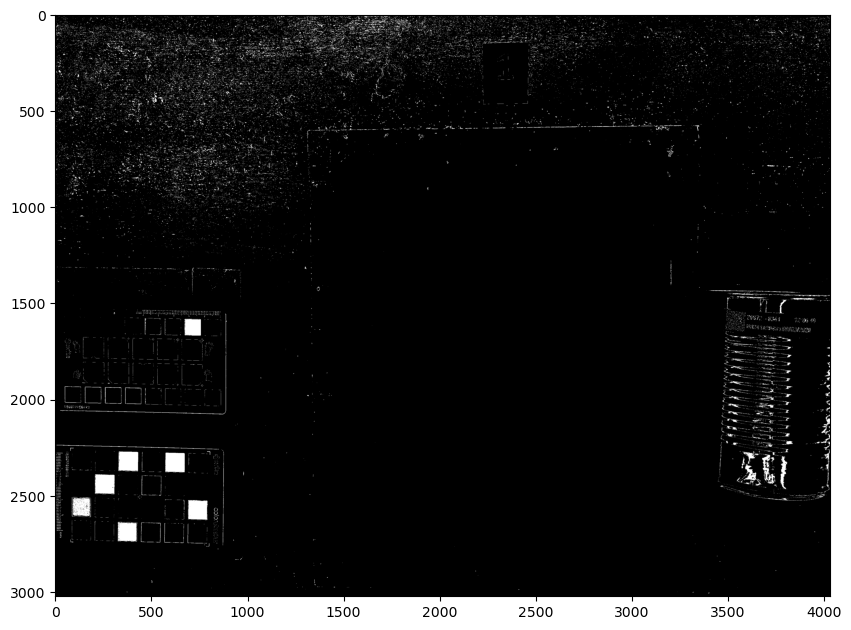

In [14]:
binary_im = color_threshold(target_img, 116,171,52,190,50,219)

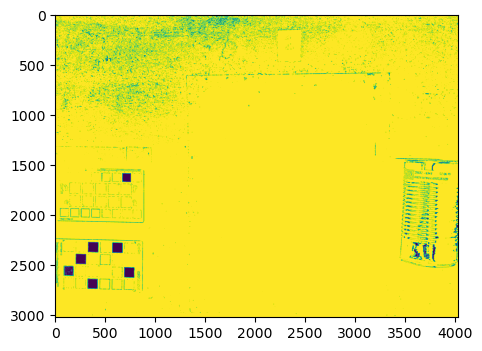

In [15]:
lab, num_features = ndimage.measurements.label(binary_im)
plt.imshow(lab==0)

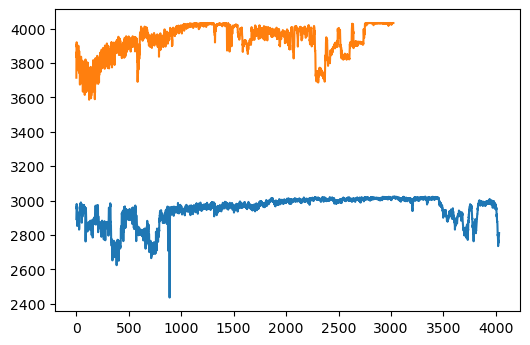

In [16]:
plt.plot(np.sum(lab==0,axis=0))
plt.plot(np.sum(lab==0,axis=1))
#temp=np.sum(lab==0,axis=0)<2500
#plt.plot(temp)
axis_0 = np.where(np.sum(lab == 0, axis = 0) < 2750)
axis_1 = np.where(np.sum(lab == 0, axis = 1) < 3700)

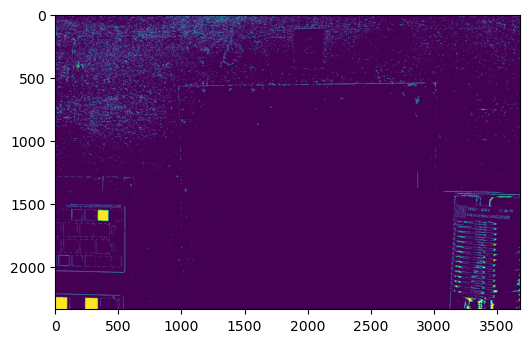

In [17]:
st1=axis_0[0][0]
st2=axis_1[0][0]
en1=axis_0[0][-1]
en2=axis_1[0][-1]
plt.imshow(binary_im[st2:en2,st1:en1])

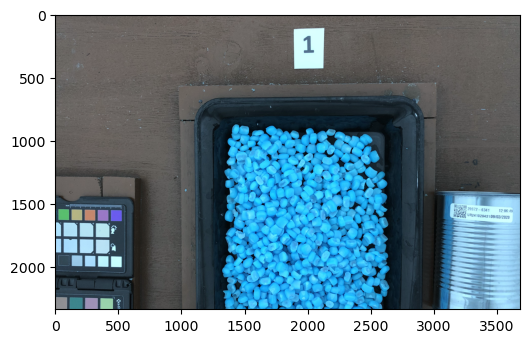

In [18]:
plt.imshow(target_img[st2:en2,st1:en1])

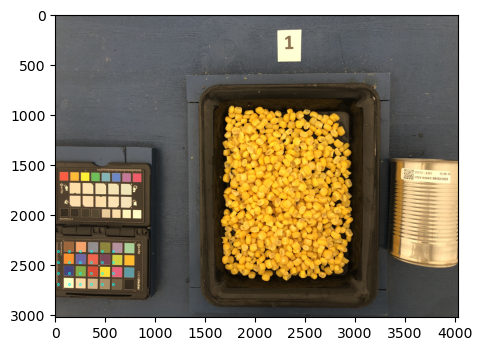

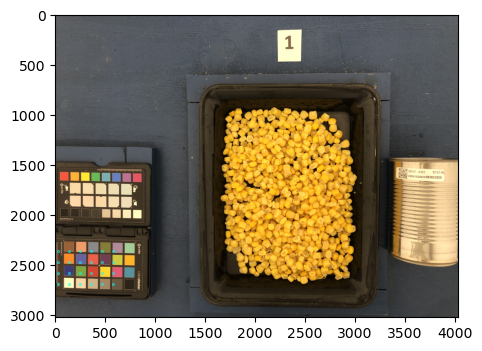

In [19]:
# Making masks based on coordinates above?
# needs work
target_mask = pcv.transform.create_color_card_mask(rgb_img=target_img, radius=10, start_coord=(st2,en2), spacing=(110,110), ncols=6, nrows=4)
source_mask = pcv.transform.create_color_card_mask(rgb_img=source_img, radius=10, start_coord=(st2,en2), spacing=(110,110), ncols=6, nrows=4)